# Deep Learning: EA FIFA

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import optimizers

Using TensorFlow backend.


## Load training data

In [3]:
df = pd.read_csv('EA_FIFA.csv')
df.columns

Index(['Name', 'Nationality', 'National_Position', 'National_Kit', 'Club',
       'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry',
       'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age',
       'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes'],
      dtype='object')

## Regression

In [4]:
df_reg = df.filter(['Rating', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes'], axis=1)
df_reg.head()

,Rating,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,94,4,5,93,92,22,23,31,63,96,...,90,81,76,85,88,14,7,15,11,11
1,93,4,4,95,97,13,26,28,48,95,...,88,89,90,74,85,14,6,15,11,8
2,92,5,5,95,96,21,33,24,56,88,...,77,79,84,81,83,15,9,15,9,11
3,92,4,4,91,86,30,38,45,78,93,...,86,86,84,85,88,33,27,31,25,37
4,92,4,1,48,30,10,11,10,29,85,...,16,14,11,47,11,91,89,95,90,89


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_reg.drop(['Rating'], axis=1), df_reg['Rating'], random_state=13)

In [6]:
np.random.seed(1125)

# Build the model
#create model
model_reg = Sequential()

#add model layers
model_reg.add(Dense(200, activation='relu', input_shape=(len(X_train.columns),)))
model_reg.add(Dense(200, activation='relu'))
model_reg.add(Dense(200, activation='relu'))
model_reg.add(Dense(1))

# Compile the model
model_reg.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [7]:
# Train the model and store training history
model_reg_hist = model_reg.fit(X_train, y_train, batch_size=64, epochs=50, verbose=0, validation_data=(X_test, y_test)) # changed the batch_size and epochs

In [8]:
# Evaluate the model
score = model_reg.evaluate(X_test, y_test, verbose=0)
y_pred = model_reg.predict(X_test)
y_pred = [y[0] for y in y_pred]
res = y_test - y_pred

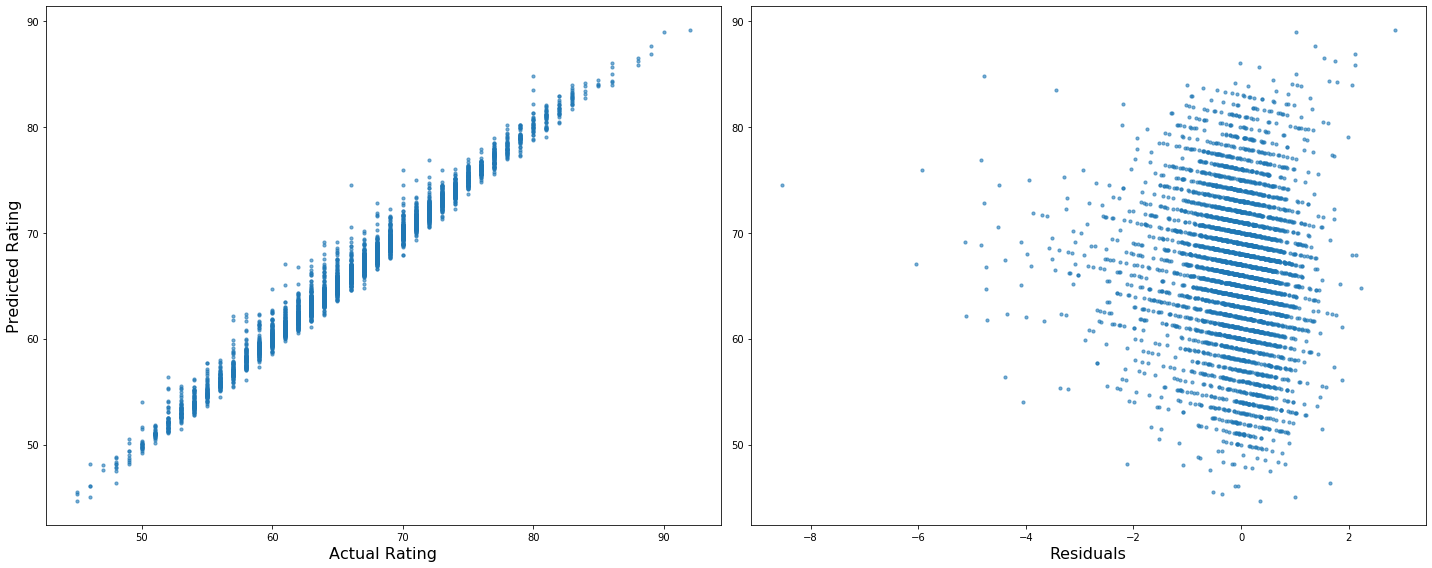

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes[0].scatter(y_test, y_pred, s=10, alpha=0.6)
axes[0].set_xlabel('Actual Rating', size=16)
axes[0].set_ylabel('Predicted Rating', size=16)

axes[1].scatter(res, y_pred, s=10, alpha=0.6)
axes[1].set_xlabel('Residuals', size=16)
plt.tight_layout()

## Classification

In [10]:
df_clf = df.filter(['Preffered_Position', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes'], axis=1)
df_clf.head()

,Preffered_Position,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,LW/ST,4,5,93,92,22,23,31,63,96,...,90,81,76,85,88,14,7,15,11,11
1,RW,4,4,95,97,13,26,28,48,95,...,88,89,90,74,85,14,6,15,11,8
2,LW,5,5,95,96,21,33,24,56,88,...,77,79,84,81,83,15,9,15,9,11
3,ST,4,4,91,86,30,38,45,78,93,...,86,86,84,85,88,33,27,31,25,37
4,GK,4,1,48,30,10,11,10,29,85,...,16,14,11,47,11,91,89,95,90,89


In [11]:
df['Preffered_Position'].unique()

array(['LW/ST', 'RW', 'LW', 'ST', 'GK', 'CB', 'LW/LM', 'CM/CDM', 'CAM/LW',
       'CM/CAM', 'ST/LW', 'CAM/RM/LM', 'LM/CAM', 'ST/RM', 'RB/CM', 'CM',
       'CAM/RM', 'CAM/LM', 'RM/RW', 'ST/CAM', 'LB/CM', 'RM/CAM',
       'CF/CAM/ST', 'CDM/CM', 'CM/CDM/LM', 'LB', 'LW/CAM', 'RW/CAM',
       'LM/LW', 'CAM/CDM', 'CAM/CM', 'CB/CDM', 'RB', 'CM/RM', 'LB/LM',
       'LM', 'CB/RB', 'CAM', 'CM/LW', 'CDM', 'RM', 'CB/LB', 'LM/RM',
       'ST/RW', 'CM/RW', 'RW/LW', 'CM/LM', 'CF/ST', 'ST/LM', 'RB/CB',
       'LM/CM/CAM', 'CAM/CF', 'CAM/ST', 'LW/CAM/LM', 'RB/RM', 'RM/LM',
       'CAM/LM/LW', 'LM/ST', 'RW/RM', 'CAM/ST/CF', 'CDM/CB', 'LB/CB',
       'RB/RWB', 'RW/ST', 'LW/CF', 'CDM/RM', 'RM/ST', 'LB/CDM', 'LM/RW',
       'RM/LW', 'RW/CM/LW', 'RB/RW', 'LB/RB', 'LB/LWB', 'CAM/RW', 'LW/RW',
       'CM/RB/CDM', 'CDM/RB', 'CM/CAM/LM', 'CF/RM', 'RB/LB', 'CF/CAM',
       'LM/CM', 'CF/LW', 'RM/CAM/ST', 'ST/RM/RW', 'CAM/CM/LM',
       'RB/RW/RWB', 'RM/RB', 'CM/CB', 'CAM/LM/CM', 'LWB/LB', 'CM/RB/RM',
       'LM/R

In [12]:
df_clf['Position'] = df_clf['Preffered_Position'].apply(lambda x: x.split('/')[0])

In [13]:
X = df_clf.drop(['Position', 'Preffered_Position'], axis=1)

# one-hot encoding
nb_classes = len(df_clf['Position'].unique())
y = np_utils.to_categorical(LabelEncoder().fit_transform(df_clf['Position']), nb_classes)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [15]:
#create model
model_clf = Sequential()

#add layers to model
model_clf.add(Dense(250, activation='relu', input_shape=(len(X_train.columns),)))
model_clf.add(Dropout(0.2))
model_clf.add(Dense(200, activation='relu'))
model_clf.add(Dropout(0.2))
model_clf.add(Dense(150, activation='relu'))
model_clf.add(Dense(nb_classes, activation='softmax'))

# Compile the model
model_clf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# Train the model and store training history
model_clf_hist = model_clf.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_test, y_test)) # changed the batch_size and epochs

Train on 13191 samples, validate on 4397 samples
Epoch 1/50
13191/13191 [==============================] - 1s 79us/step - loss: 3.1751 - accuracy: 0.4478 - val_loss: 1.0759 - val_accuracy: 0.6202
Epoch 2/50
13191/13191 [==============================] - 1s 63us/step - loss: 1.1849 - accuracy: 0.5770 - val_loss: 0.9625 - val_accuracy: 0.6359
Epoch 3/50
13191/13191 [==============================] - 1s 61us/step - loss: 1.0635 - accuracy: 0.6059 - val_loss: 0.9031 - val_accuracy: 0.6625
Epoch 4/50
13191/13191 [==============================] - 1s 61us/step - loss: 0.9930 - accuracy: 0.6309 - val_loss: 0.9026 - val_accuracy: 0.6543
Epoch 5/50
13191/13191 [==============================] - 1s 61us/step - loss: 0.9760 - accuracy: 0.6322 - val_loss: 0.8927 - val_accuracy: 0.6532
Epoch 6/50
13191/13191 [==============================] - 1s 61us/step - loss: 0.9798 - accuracy: 0.6278 - val_loss: 0.8693 - val_accuracy: 0.6743
Epoch 7/50
13191/13191 [==============================] - 1s 62us/ste

Test score: 0.8350901499997222
Test accuracy: 0.6697748303413391


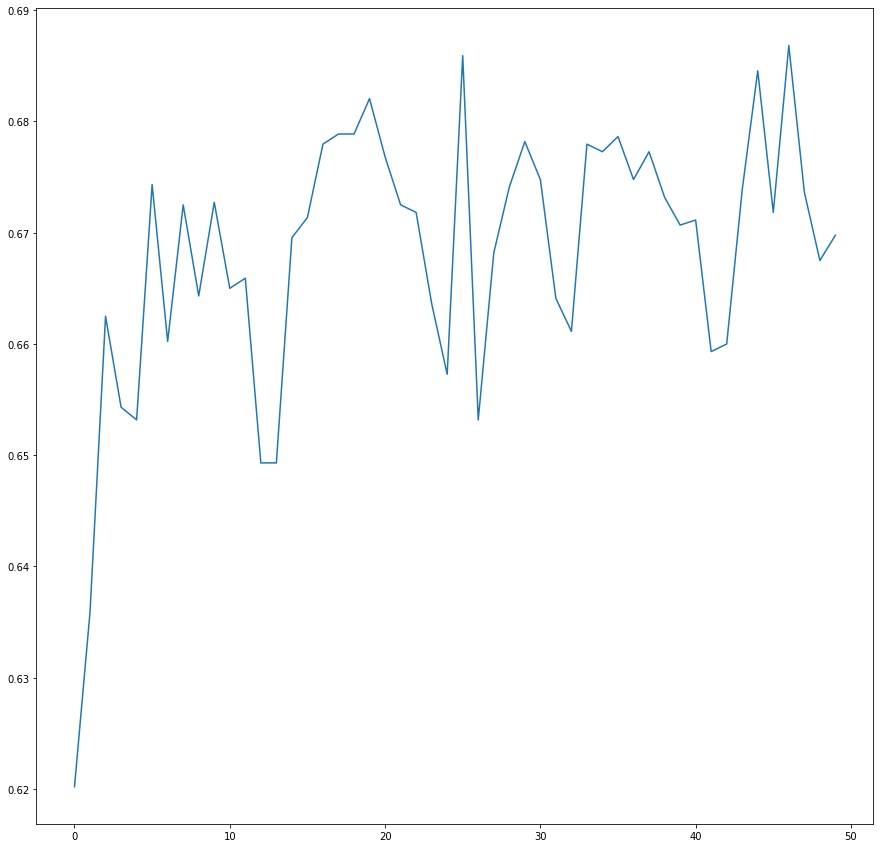

In [18]:
# Evaluate the model
score = model_clf.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
plt.figure(figsize=(15,15))
plt.plot(model_clf_hist.history['val_accuracy'])
plt.show()